Notebook pour travailler sur la base de donnees des achats de pesticides par département 

In [1]:
!pip install chardet 

Import de la base de données pour les Achats de pesticides de 2017 à 2022 avec sélection du fichier qui m'intéresse: substance_dept_ANNEE. Tous les fichiers qui m'intéressent sont mis dans le dossier dossier_Achat_pesticides_selected.

In [2]:
import requests
import zipfile
import io
import os
import re
import pandas as pd

# Liste des URLs des fichiers ZIP
urls_zip = {
    "2017": "https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2017.zip",
    "2018": "https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2018.zip",
    "2019": "https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2019.zip",
    "2020": "https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2020.zip",
    "2021": "https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2021.zip",
    "2022": "https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2022.zip"
}

# Dossier où seront stockés les fichiers CSV sélectionnés
output_dir = "dossier_Achats_pesticides_selected"
os.makedirs(output_dir, exist_ok=True)

# Modèle de nom de fichier cible (expression régulière)
file_pattern = r"BNVD_TRACABILITE_\d+_ACHAT_DPT_SUBSTANCE_(\d{4})\.csv"

# Boucle pour traiter chaque fichier ZIP
for year, url in urls_zip.items():
    print(f"--- Année {year} : Récupération des données depuis {url} ---")
    try:
        # Télécharger le fichier ZIP en mémoire
        response = requests.get(url)
        response.raise_for_status()
        
        # Ouvrir le fichier ZIP en mémoire
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            # Filtrer pour sélectionner uniquement le fichier correspondant au modèle
            csv_files = [name for name in z.namelist() if re.search(file_pattern, name)]
            if csv_files:
                target_file = csv_files[0]  # Sélectionner le fichier correspondant
                print(f"Fichier CSV sélectionné pour {year} : {target_file}")
                
                # Construire le chemin pour sauvegarder le fichier dans le répertoire final
                output_path = os.path.join(output_dir, f"achats_pesticides_{year}.csv")
                
                # Extraire et sauvegarder le fichier CSV directement
                with z.open(target_file) as f:
                    df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")
                    df.to_csv(output_path, index=False, sep=";")
                    print(f"Fichier pour {year} sauvegardé : {output_path}")
            else:
                print(f"Aucun fichier correspondant trouvé dans l'archive ZIP pour {year}")
    except Exception as e:
        print(f"Erreur pour l'année {year} : {e}")

print("\n--- Traitement terminé. Tous les fichiers CSV sont dans le dossier : dossier_Achats_pesticides_selected ---")


--- Année 2017 : Récupération des données depuis https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2017.zip ---
Fichier CSV sélectionné pour 2017 : BNVD_TRACABILITE_20231023_ACHAT_DPT_SUBSTANCE_2017.csv


/tmp/ipykernel_187389/964353735.py:46: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")


Fichier pour 2017 sauvegardé : dossier_Achats_pesticides_selected/achats_pesticides_2017.csv
--- Année 2018 : Récupération des données depuis https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2018.zip ---
Fichier CSV sélectionné pour 2018 : BNVD_TRACABILITE_20231023_ACHAT_DPT_SUBSTANCE_2018.csv


/tmp/ipykernel_187389/964353735.py:46: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")


Fichier pour 2018 sauvegardé : dossier_Achats_pesticides_selected/achats_pesticides_2018.csv
--- Année 2019 : Récupération des données depuis https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2019.zip ---
Fichier CSV sélectionné pour 2019 : BNVD_TRACABILITE_20231023_ACHAT_DPT_SUBSTANCE_2019.csv


/tmp/ipykernel_187389/964353735.py:46: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")


Fichier pour 2019 sauvegardé : dossier_Achats_pesticides_selected/achats_pesticides_2019.csv
--- Année 2020 : Récupération des données depuis https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2020.zip ---
Fichier CSV sélectionné pour 2020 : BNVD_TRACABILITE_20231023_ACHAT_DPT_SUBSTANCE_2020.csv


/tmp/ipykernel_187389/964353735.py:46: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")


Fichier pour 2020 sauvegardé : dossier_Achats_pesticides_selected/achats_pesticides_2020.csv
--- Année 2021 : Récupération des données depuis https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2021.zip ---
Fichier CSV sélectionné pour 2021 : BNVD_TRACABILITE_20231023_ACHAT_DPT_SUBSTANCE_2021.csv


/tmp/ipykernel_187389/964353735.py:46: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")


Fichier pour 2021 sauvegardé : dossier_Achats_pesticides_selected/achats_pesticides_2021.csv
--- Année 2022 : Récupération des données depuis https://data.ofb.fr/catalogue/Donnees-geographiques-OFB/api/records/a69c8e76-13e1-4f87-9f9d-1705468b7221/attachments/BNVD_TRACABILITE_20231024_ACHAT_2022.zip ---
Fichier CSV sélectionné pour 2022 : BNVD_TRACABILITE_20231023_ACHAT_DPT_SUBSTANCE_2022.csv


/tmp/ipykernel_187389/964353735.py:46: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=";", encoding="utf-8", on_bad_lines="skip")


Fichier pour 2022 sauvegardé : dossier_Achats_pesticides_selected/achats_pesticides_2022.csv

--- Traitement terminé. Tous les fichiers CSV sont dans le dossier : dossier_Achats_pesticides_selected ---


In [3]:
# Répertoire contenant les fichiers CSV
input_dir = "/home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected"

# Liste des années à traiter
annees = range(2017, 2023)

# Dictionnaire pour stocker les DataFrames par année
dataframes = {}

# Boucle pour lire les fichiers de chaque année
for annee in annees:
    file_path = os.path.join(input_dir, f"achats_pesticides_{annee}.csv")
    try:
        print(f"Lecture du fichier : {file_path}")
        df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")
        dataframes[annee] = df  # Stocker le DataFrame dans le dictionnaire
        print(f"Année {annee} chargée avec succès. Nombre de lignes : {len(df)}")
    except Exception as e:
        print(f"Erreur pour l'année {annee} : {e}")

# Exemple : Accéder aux données pour une année spécifique
print("\nAperçu des données de 2017 :")
dataframes[2017].head()


Lecture du fichier : /home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected/achats_pesticides_2017.csv
Année 2017 chargée avec succès. Nombre de lignes : 127088
Lecture du fichier : /home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected/achats_pesticides_2018.csv


/tmp/ipykernel_187389/3330750711.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")
/tmp/ipykernel_187389/3330750711.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")


Année 2018 chargée avec succès. Nombre de lignes : 127328
Lecture du fichier : /home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected/achats_pesticides_2019.csv
Année 2019 chargée avec succès. Nombre de lignes : 112807
Lecture du fichier : /home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected/achats_pesticides_2020.csv


/tmp/ipykernel_187389/3330750711.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")
/tmp/ipykernel_187389/3330750711.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")


Année 2020 chargée avec succès. Nombre de lignes : 111224
Lecture du fichier : /home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected/achats_pesticides_2021.csv
Année 2021 chargée avec succès. Nombre de lignes : 109573
Lecture du fichier : /home/onyxia/work/AgricultureBio_France/Cartographie Eaux souterraines/dossier_Achats_pesticides_selected/achats_pesticides_2022.csv
Année 2022 chargée avec succès. Nombre de lignes : 106661

Aperçu des données de 2017 :


/tmp/ipykernel_187389/3330750711.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")
/tmp/ipykernel_187389/3330750711.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=";", encoding="utf-8", on_bad_lines="skip")


,annee,code_departement,departement,amm,substance,cas,quantite_substance,classification,classification_mention,achat_etranger
0,2017,00,INDETERMINE,2179999,mesosulfuron-methyl,208465-21-8,2.77500,N Organique,NaN,Non
1,2017,00,INDETERMINE,2010618,cuivre du sulfate de cuivre,8011-63-0,247.02400,N minéral,NaN,Non
2,2017,00,INDETERMINE,2010628,trifloxystrobine,141517-21-7,1.00000,N Organique,NaN,Non
3,2017,00,INDETERMINE,2010637,"2,4-d",94-75-7,0.26040,N Organique,NaN,Non
4,2017,00,INDETERMINE,2010637,triclopyr,55335-06-3,0.29008,N Organique,NaN,Non


Je remarque que dans les premières lignes, la colonne des département est ne comporte que des valeurs 00 pour le code_departement, et la mention "INDETERMINE" pour le departement. On teste voir si ce n'est que sur quelques lignes ou s'il n'y a aucune valeur de département.

In [4]:
# Variables à extraire
variables = ["code_departement", "departement"]

# Créer des ensembles pour stocker les valeurs uniques
codes_departements = set()
noms_departements = set()

# Parcourir les DataFrames par année
for annee, df in dataframes.items():
    print(f"Traitement des données pour l'année {annee}")
    # Ajouter les valeurs uniques pour chaque variable, si les colonnes existent
    if "code_departement" in df.columns:
        codes_departements.update(df["code_departement"].dropna().astype(str).unique())
    if "departement" in df.columns:
        noms_departements.update(df["departement"].dropna().astype(str).unique())

# Convertir en liste pour affichage ordonné
codes_departements = sorted(list(codes_departements))
noms_departements = sorted(list(noms_departements))

# Afficher les résultats
print("\nToutes les valeurs uniques de 'code_departement' :")
print(codes_departements)

print("\nToutes les valeurs uniques de 'departement' :")
print(noms_departements)


Traitement des données pour l'année 2017
Traitement des données pour l'année 2018
Traitement des données pour l'année 2019
Traitement des données pour l'année 2020
Traitement des données pour l'année 2021
Traitement des données pour l'année 2022

Toutes les valeurs uniques de 'code_departement' :
['0', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '976']

Toutes les valeurs uniques de 'departement' :
['AIN', 'AISNE', 'ALLI

Génial !! Il n'y a pas que des valeurs nulles. 

Néanmoins, je vais essayer de quantifier leur importance dans le df puis les supprimer si elles sont négligeables. 

In [5]:
# Dictionnaire pour stocker les résultats
proportions = {}

# Parcourir les DataFrames par année
for annee, df in dataframes.items():
    if "code_departement" in df.columns:
        # Nombre total de valeurs non nulles dans la colonne code_departement
        total_valid = df["code_departement"].dropna().shape[0]
        
        # Nombre de valeurs égales à "00"
        count_00 = df["code_departement"].dropna().astype(str).eq("00").sum()
        
        # Calcul de la proportion
        proportion = count_00 / total_valid if total_valid > 0 else 0
        
        # Stocker le résultat
        proportions[annee] = proportion
        print(f"Année {annee} : {count_00} occurrences de '00' sur {total_valid} valeurs ({proportion:.2%})")
    else:
        print(f"Année {annee} : Colonne 'code_departement' non trouvée.")
        proportions[annee] = None


Année 2017 : 722 occurrences de '00' sur 127088 valeurs (0.57%)
Année 2018 : 888 occurrences de '00' sur 127328 valeurs (0.70%)
Année 2019 : 526 occurrences de '00' sur 112807 valeurs (0.47%)
Année 2020 : 592 occurrences de '00' sur 111224 valeurs (0.53%)
Année 2021 : 664 occurrences de '00' sur 109573 valeurs (0.61%)
Année 2022 : 542 occurrences de '00' sur 106661 valeurs (0.51%)


Les proportions de valeurs nulles sont négligeables dans mes df, je me permets donc de les supprimer.

In [6]:
# Parcourir les DataFrames et supprimer les lignes avec code_departement == "00"
for annee, df in dataframes.items():
    if "code_departement" in df.columns:
        # Filtrer les lignes où code_departement est différent de "00"
        initial_rows = len(df)
        dataframes[annee] = df[df["code_departement"].astype(str) != "00"].reset_index(drop=True)
        final_rows = len(dataframes[annee])
        
        print(f"Année {annee} : {initial_rows - final_rows} lignes supprimées. Nouveau total : {final_rows} lignes.")
    else:
        print(f"Année {annee} : Colonne 'code_departement' non trouvée, aucune modification effectuée.")

print("\nSuppression terminée. Les lignes avec 'code_departement' == '00' ont été supprimées.")


Année 2017 : 722 lignes supprimées. Nouveau total : 126366 lignes.
Année 2018 : 888 lignes supprimées. Nouveau total : 126440 lignes.
Année 2019 : 526 lignes supprimées. Nouveau total : 112281 lignes.
Année 2020 : 592 lignes supprimées. Nouveau total : 110632 lignes.
Année 2021 : 664 lignes supprimées. Nouveau total : 108909 lignes.
Année 2022 : 542 lignes supprimées. Nouveau total : 106119 lignes.

Suppression terminée. Les lignes avec 'code_departement' == '00' ont été supprimées.


Je réalise à présent les cartographie des achats. 

In [7]:
pip install geopandas pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt


# Charger le fond de carte des départements français
url_geojson = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
departements_gdf = gpd.read_file(url_geojson)

# Dictionnaire de DataFrames (créé précédemment)
# Exemple : dataframes = {2017: df2017, 2018: df2018, ..., 2022: df2022}

# Créer un répertoire pour sauvegarder les cartes
output_dir = "cartes_achats_pesticides"
os.makedirs(output_dir, exist_ok=True)

# Boucle pour chaque année et création de la carte
for annee, df in dataframes.items():
    if "code_departement" in df.columns and "quantite_substance" in df.columns:
        print(f"Traitement des données pour l'année {annee}...")

        # Agréger les quantités par département
        quantites_par_departement = (
            df.groupby("code_departement")["quantite_substance"]
            .sum()
            .reset_index()
            .rename(columns={"code_departement": "code"})
        )
        
        # Assurez-vous que le code département est une chaîne de 2 caractères
        quantites_par_departement["code"] = quantites_par_departement["code"].astype(str).str.zfill(2)

        # Fusionner avec le GeoDataFrame des départements
        merged_gdf = departements_gdf.merge(quantites_par_departement, left_on="code", right_on="code", how="left")

        # Remplacer les NaN par 0 pour les départements sans données
        merged_gdf["quantite_substance"] = merged_gdf["quantite_substance"].fillna(0)

        # Créer la carte
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        merged_gdf.plot(column="quantite_substance",
                        cmap="Oranges",  # Colormap pour la colorimétrie
                        linewidth=0.8,
                        edgecolor="black",
                        legend=True,
                        ax=ax)

        # Ajouter le titre
        plt.title(f"Carte des achats de pesticides par département - Année {annee}", fontsize=12)
        
        # Retirer les axes
        ax.axis("off")

        # Sauvegarder la carte
        output_path = os.path.join(output_dir, f"carte_achats_pesticides_{annee}.png")
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Carte sauvegardée : {output_path}")

print("\nToutes les cartes ont été générées et sauvegardées dans le dossier 'cartes_achats_pesticides'.")


Traitement des données pour l'année 2017...
Carte sauvegardée : cartes_achats_pesticides/carte_achats_pesticides_2017.png
Traitement des données pour l'année 2018...
Carte sauvegardée : cartes_achats_pesticides/carte_achats_pesticides_2018.png
Traitement des données pour l'année 2019...
Carte sauvegardée : cartes_achats_pesticides/carte_achats_pesticides_2019.png
Traitement des données pour l'année 2020...
Carte sauvegardée : cartes_achats_pesticides/carte_achats_pesticides_2020.png
Traitement des données pour l'année 2021...
Carte sauvegardée : cartes_achats_pesticides/carte_achats_pesticides_2021.png
Traitement des données pour l'année 2022...
Carte sauvegardée : cartes_achats_pesticides/carte_achats_pesticides_2022.png

Toutes les cartes ont été générées et sauvegardées dans le dossier 'cartes_achats_pesticides'.


J'essaie d'avoir une représentation graphique plus nette pour avoir une idée de l'évolution entre les années.

Variations des quantités de pesticides par département :
annee                      2018          2019           2020           2021  \
code_departement                                                              
0                 285080.318476 -3.916480e+05 -720722.297263  167859.131997   
1                 187946.790448 -7.966968e+04   40081.433510    9155.048167   
2                      0.000000  0.000000e+00  608205.719704  -48738.487450   
50               -296558.647488 -3.400483e+05       0.000000       0.000000   
51                180122.382853 -2.807595e+06       0.000000       0.000000   

annee                      2022  
code_departement                 
0                -275900.715528  
1                 136470.050557  
2                -316019.858914  
50                     0.000000  
51                     0.000000  


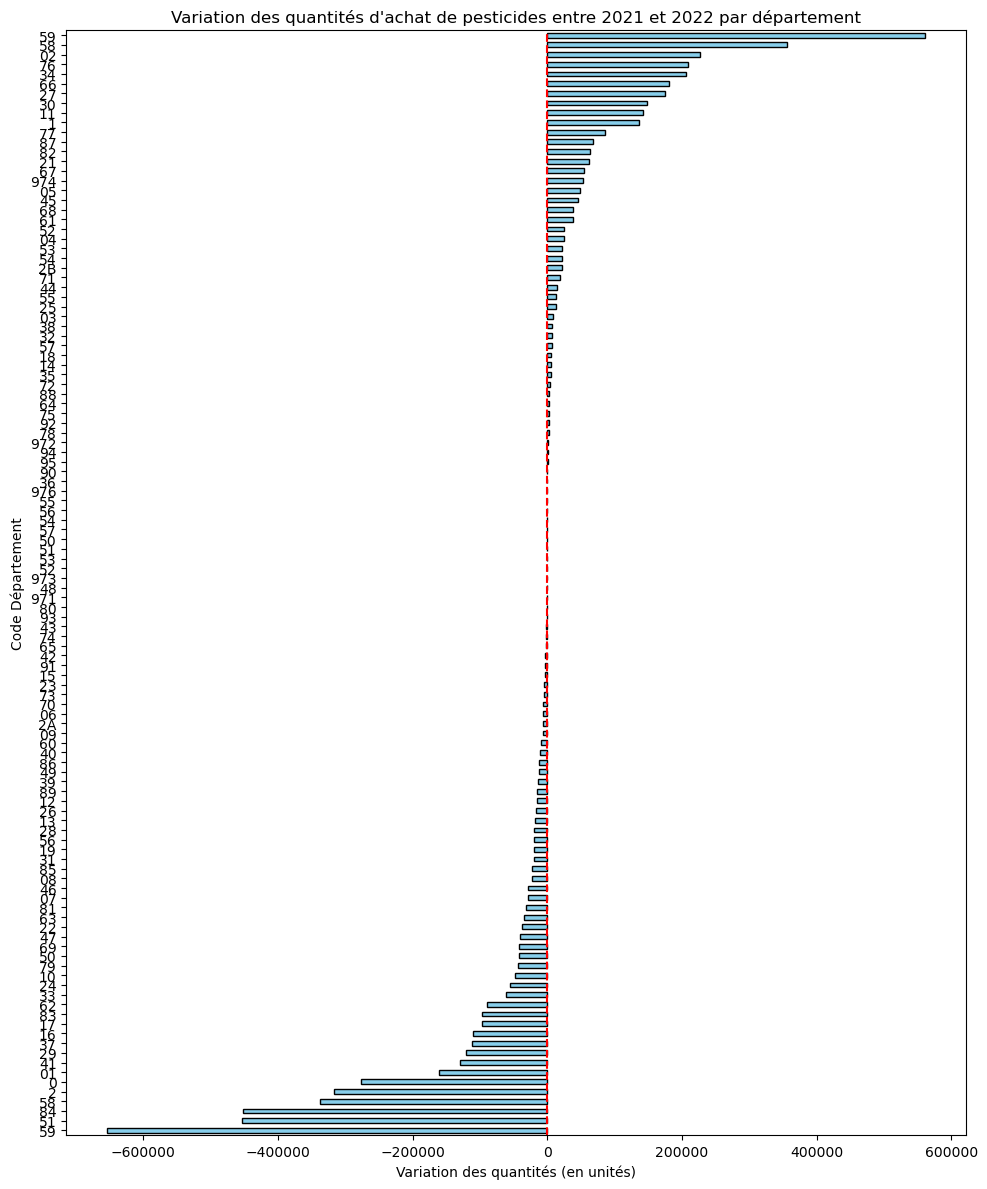

In [9]:
# Créer un DataFrame global pour stocker les agrégations par année et département
evolution_df = pd.DataFrame()

# Agréger les données par département et année
for annee, df in dataframes.items():
    if "code_departement" in df.columns and "quantite_substance" in df.columns:
        aggregated = df.groupby("code_departement")["quantite_substance"].sum().reset_index()
        aggregated["annee"] = annee
        evolution_df = pd.concat([evolution_df, aggregated], ignore_index=True)

# Pivot pour obtenir une colonne par année
pivot_df = evolution_df.pivot(index="code_departement", columns="annee", values="quantite_substance").fillna(0)

# Calculer les variations entre les années successives
variations_df = pivot_df.diff(axis=1).dropna(axis=1)  # Calcul des différences entre colonnes successives

# Affichage des variations
print("Variations des quantités de pesticides par département :")
print(variations_df.head())

# Représentation graphique : barres horizontales pour les variations entre 2021 et 2022
variation_2021_2022 = variations_df[2022]  # Variation entre 2021 et 2022

# Trier pour améliorer la lisibilité
variation_2021_2022_sorted = variation_2021_2022.sort_values()

# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 12))
variation_2021_2022_sorted.plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Variation des quantités d'achat de pesticides entre 2021 et 2022 par département")
plt.xlabel("Variation des quantités (en unités)")
plt.ylabel("Code Département")
plt.axvline(0, color="red", linestyle="--")  # Ligne pour marquer 0 (aucun changement)
plt.tight_layout()

# Sauvegarder la figure
plt.savefig("variation_pesticides_2021_2022.png", dpi=300)
plt.show()


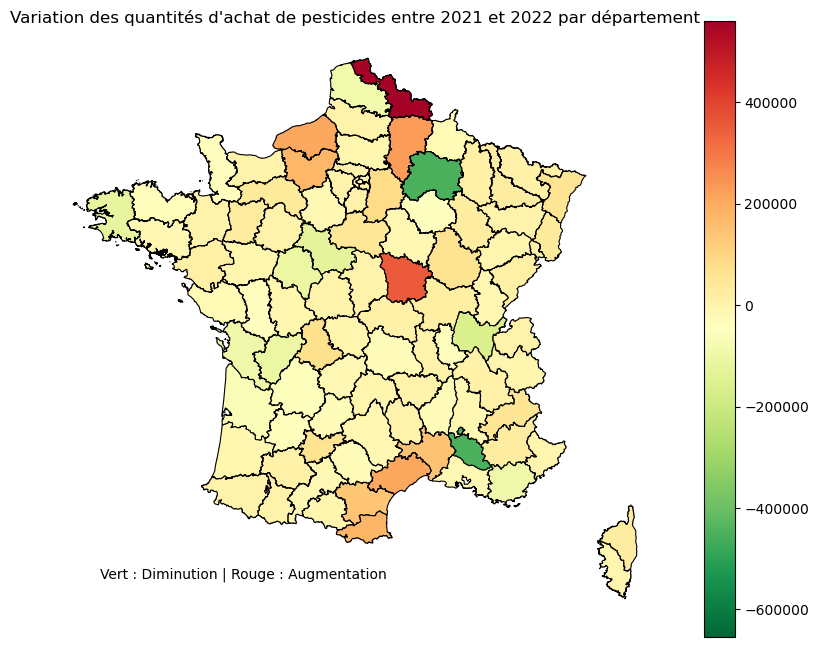

Carte sauvegardée : cartes_variations_pesticides/carte_variation_pesticides_2021_2022.png


In [10]:
# Charger le fond de carte des départements français
url_geojson = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
departements_gdf = gpd.read_file(url_geojson)

# Créer un DataFrame global pour stocker les agrégations par année et département
evolution_df = pd.DataFrame()

# Agréger les données par département et année
for annee, df in dataframes.items():
    if "code_departement" in df.columns and "quantite_substance" in df.columns:
        aggregated = df.groupby("code_departement")["quantite_substance"].sum().reset_index()
        aggregated["annee"] = annee
        evolution_df = pd.concat([evolution_df, aggregated], ignore_index=True)

# Restructurer les données : pivoter pour avoir une colonne par année
pivot_df = evolution_df.pivot(index="code_departement", columns="annee", values="quantite_substance").fillna(0)

# Calculer la variation entre 2021 et 2022
pivot_df["variation_2021_2022"] = pivot_df[2022] - pivot_df[2021]

# Assurez-vous que les codes départements sont au bon format (2 caractères)
pivot_df = pivot_df.reset_index()
pivot_df["code_departement"] = pivot_df["code_departement"].astype(str).str.zfill(2)

# Fusionner avec le GeoDataFrame des départements
merged_gdf = departements_gdf.merge(pivot_df, left_on="code", right_on="code_departement", how="left")

# Créer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_gdf.plot(column="variation_2021_2022",
                cmap="RdYlGn_r",  # Colormap : Vert pour diminutions, Rouge pour augmentations
                linewidth=0.8,
                edgecolor="black",
                legend=True,
                ax=ax)

# Personnalisation de la carte
plt.title("Variation des quantités d'achat de pesticides entre 2021 et 2022 par département")
ax.axis("off")  # Retirer les axes

# Ajouter une annotation pour la légende
plt.annotate("Vert : Diminution | Rouge : Augmentation", xy=(0.1, 0.1), xycoords="figure fraction", fontsize=10)

# Sauvegarder la carte
output_dir = "cartes_variations_pesticides"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "carte_variation_pesticides_2021_2022.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Carte sauvegardée : {output_path}")


J'aimerais pondérer ces quantités en fonction de la toxicité des pesticides. 

Cette toxicité est renseignée dans les variables : classification et classification_mention. Etudions les.

In [11]:
# Créer des ensembles pour collecter les valeurs uniques
classification_mention_values = set()
classification_values = set()

# Parcourir chaque DataFrame pour collecter les valeurs uniques
for annee, df in dataframes.items():
    print(f"Traitement des données pour l'année {annee}...")
    
    # Collecte des valeurs uniques pour classification_mention
    if "classification_mention" in df.columns:
        unique_mentions = df["classification_mention"].dropna().unique()
        classification_mention_values.update(unique_mentions)
        print(f"  Valeurs uniques de 'classification_mention' : {unique_mentions}")
    else:
        print("  Colonne 'classification_mention' non trouvée.")

    # Collecte des valeurs uniques pour classification
    if "classification" in df.columns:
        unique_classifications = df["classification"].dropna().unique()
        classification_values.update(unique_classifications)
        print(f"  Valeurs uniques de 'classification' : {unique_classifications}")
    else:
        print("  Colonne 'classification' non trouvée.")

# Affichage des valeurs uniques globales
print("\nValeurs uniques globales pour 'classification_mention' :")
print(sorted(classification_mention_values))

print("\nValeurs uniques globales pour 'classification' :")
print(sorted(classification_values))


Traitement des données pour l'année 2017...
  Valeurs uniques de 'classification_mention' : []
  Valeurs uniques de 'classification' : ['Autre' 'T, T+, CMR' 'N Organique' 'N minéral']
Traitement des données pour l'année 2018...
  Valeurs uniques de 'classification_mention' : []
  Valeurs uniques de 'classification' : ['N Organique' 'T, T+, CMR' 'Autre' 'N minéral']
Traitement des données pour l'année 2019...
  Valeurs uniques de 'classification_mention' : ['Substitution' 'Exclusion']
  Valeurs uniques de 'classification' : ['Autre' 'CMR' 'Santé A' 'Env A' 'Env B']
Traitement des données pour l'année 2020...
  Valeurs uniques de 'classification_mention' : ['Substitution' 'Exclusion']
  Valeurs uniques de 'classification' : ['CMR' 'Env A' 'Autre' 'Env B' 'Santé A']
Traitement des données pour l'année 2021...
  Valeurs uniques de 'classification_mention' : ['Substitution' 'Exclusion']
  Valeurs uniques de 'classification' : ['Env A' 'Env B' 'Santé A' 'CMR' 'Autre']
Traitement des données 

**Signification des variables `classification_mention` :**

1. *Exclusion*

Définition : Une substance est classée en "exclusion" lorsqu'elle ne répond pas aux critères des paragraphes 3.6 et 3.7 de l'annexe II du règlement (CE) n° 1107/2009.

Critères concernés :
- Paragraphe 3.6 : La substance est cancérogène, mutagène ou toxique pour la reproduction (catégories 1A ou 1B).
- Paragraphe 3.7 : La substance possède des propriétés perturbant le système endocrinien susceptibles d'avoir des effets nocifs sur la santé humaine.

Conséquence : Les substances classées dans cette catégorie ne peuvent pas être approuvées pour une utilisation en raison des risques pour la santé humaine et animale, sauf en cas d'exposition humaine négligeable.

2. *Substitution*

Définition : Une substance est classée en "substitution" lorsqu'on envisage sa substitution conformément à l'article 24 du règlement (CE) n° 1107/2009.

Critères concernés :
La substance présente des propriétés préoccupantes mais ne remplit pas encore les critères stricts d'exclusion.
Il existe des alternatives moins dangereuses (des substances ou des méthodes de contrôle alternatives ayant un risque réduit pour la santé humaine, animale ou l'environnement).

Objectif : Encourager la remplacement progressif de ces substances par des solutions plus sûres pour la santé et l'environnement.

**Synthèse**

*Exclusion* : Substances hautement préoccupantes qui ne respectent pas les critères de sécurité pour la santé humaine (cancérogène, mutagène, perturbateur endocrinien).

*Substitution* : Substances préoccupantes pour lesquelles des alternatives plus sûres sont envisageables à moyen terme.

J'essaie de voir la proportion de substances qualifiées d'Exclusion ou de Substitution pour savoir si c'est une donnée sur laquelle je peux travailler car assez représentative.

In [12]:
# Initialiser un DataFrame pour stocker les résultats
resultats_mentions = []

# Boucle pour chaque année
for annee, df in dataframes.items():
    print(f"Traitement des données pour l'année {annee}...")
    
    # Vérifier que les colonnes nécessaires existent
    if "classification_mention" in df.columns and "quantite_substance" in df.columns:
        # Filtrer les données valides (quantite_substance non nulle)
        df_valid = df.dropna(subset=["classification_mention", "quantite_substance"])
        
        # Calculer les quantités totales et par mention
        total_quantite = df_valid["quantite_substance"].sum()
        quantites_par_mention = (
            df_valid.groupby("classification_mention")["quantite_substance"]
            .sum()
            .reset_index()
        )
        
        # Ajouter la part en pourcentage
        quantites_par_mention["part (%)"] = (quantites_par_mention["quantite_substance"] / total_quantite) * 100
        
        # Ajouter l'année dans les résultats
        quantites_par_mention["annee"] = annee
        
        # Stocker les résultats
        resultats_mentions.append(quantites_par_mention)
    else:
        print(f"  Colonnes manquantes pour l'année {annee}. Aucune donnée traitée.")

# Concaténer les résultats pour toutes les années
resultats_mentions_df = pd.concat(resultats_mentions, ignore_index=True)

# Afficher les résultats finaux
print("\nPart des achats de pesticides par mention (Exclusion, Substitution) :")
print(resultats_mentions_df)



Traitement des données pour l'année 2017...
Traitement des données pour l'année 2018...
Traitement des données pour l'année 2019...
Traitement des données pour l'année 2020...
Traitement des données pour l'année 2021...
Traitement des données pour l'année 2022...

Part des achats de pesticides par mention (Exclusion, Substitution) :
  classification_mention  quantite_substance   part (%)  annee
0              Exclusion        1.313427e+05   8.177633   2019
1           Substitution        1.474778e+06  91.822367   2019
2              Exclusion        9.539600e+05  18.157421   2020
3           Substitution        4.299870e+06  81.842579   2020
4              Exclusion        7.989914e+05  14.098073   2021
5           Substitution        4.868389e+06  85.901927   2021
6              Exclusion        1.316826e+05   2.605954   2022
7           Substitution        4.921462e+06  97.394046   2022


In [13]:
# Dictionnaire pour stocker les résultats
proportions_mentions = []

# Boucle pour chaque année et calcul des proportions
for annee, df in dataframes.items():
    print(f"Traitement des données pour l'année {annee}...")

    if "classification_mention" in df.columns:
        # Total des lignes
        total_lignes = len(df)
        
        # Compter les valeurs Substitution et Exclusion
        nb_substitution = (df["classification_mention"] == "Substitution").sum()
        nb_exclusion = (df["classification_mention"] == "Exclusion").sum()
        
        # Calcul des proportions
        proportion_substitution = (nb_substitution / total_lignes) * 100
        proportion_exclusion = (nb_exclusion / total_lignes) * 100
        proportion_nulle = df["classification_mention"].isna().sum() / total_lignes * 100
        
        # Stocker les résultats
        proportions_mentions.append({
            "Année": annee,
            "Proportion Substitution (%)": proportion_substitution,
            "Proportion Exclusion (%)": proportion_exclusion,
            "Proportion Nulle (%)": proportion_nulle
        })

        print(f"  Substitution : {proportion_substitution:.2f}% | Exclusion : {proportion_exclusion:.2f}% | Valeurs nulles : {proportion_nulle:.2f}%")
    else:
        print(f"  Colonne 'classification_mention' non trouvée pour l'année {annee}.")

# Créer un DataFrame avec les résultats
resultats_df = pd.DataFrame(proportions_mentions)

# Afficher les résultats finaux
print("\nRésumé des proportions de 'Substitution', 'Exclusion' et valeurs nulles :")
print(resultats_df)

Traitement des données pour l'année 2017...
  Substitution : 0.00% | Exclusion : 0.00% | Valeurs nulles : 100.00%
Traitement des données pour l'année 2018...
  Substitution : 0.00% | Exclusion : 0.00% | Valeurs nulles : 100.00%
Traitement des données pour l'année 2019...
  Substitution : 4.19% | Exclusion : 1.99% | Valeurs nulles : 93.82%
Traitement des données pour l'année 2020...
  Substitution : 7.53% | Exclusion : 2.09% | Valeurs nulles : 90.38%
Traitement des données pour l'année 2021...
  Substitution : 7.77% | Exclusion : 1.99% | Valeurs nulles : 90.24%
Traitement des données pour l'année 2022...
  Substitution : 7.92% | Exclusion : 1.07% | Valeurs nulles : 91.01%

Résumé des proportions de 'Substitution', 'Exclusion' et valeurs nulles :
   Année  Proportion Substitution (%)  Proportion Exclusion (%)  \
0   2017                     0.000000                  0.000000   
1   2018                     0.000000                  0.000000   
2   2019                     4.192161       

Je pondère.

In [14]:
# Définition des poids
poids = {
    "Exclusion": 3,       # Pondération la plus élevée
    "Substitution": 2.5,    # Pondération intermédiaire
}

# Boucle pour pondérer les données dans chaque DataFrame
for annee, df in dataframes.items():
    print(f"Application des pondérations pour l'année {annee}...")
    
    if "classification_mention" in df.columns and "quantite_substance" in df.columns:
        # Ajouter une colonne de pondération en fonction de 'classification_mention'
        df["poids"] = df["classification_mention"].map(poids).fillna(1)
        
        # Créer une colonne 'quantite_ponderee'
        df["quantite_ponderee"] = df["quantite_substance"] * df["poids"]
        
        # Mettre à jour le DataFrame dans le dictionnaire
        dataframes[annee] = df
        
        print(f"  Pondération appliquée. Exemple de données pondérées :")
        print(df[["classification_mention", "quantite_substance", "poids", "quantite_ponderee"]].head())
    else:
        print(f"  Colonnes manquantes pour l'année {annee}. Aucune pondération appliquée.")




Application des pondérations pour l'année 2017...
  Pondération appliquée. Exemple de données pondérées :
   classification_mention  quantite_substance  poids  quantite_ponderee
0                     NaN            130.3800    1.0           130.3800
1                     NaN           3438.0550    1.0          3438.0550
2                     NaN              1.5672    1.0             1.5672
3                     NaN           5296.0000    1.0          5296.0000
4                     NaN            130.7500    1.0           130.7500
Application des pondérations pour l'année 2018...
  Pondération appliquée. Exemple de données pondérées :
   classification_mention  quantite_substance  poids  quantite_ponderee
0                     NaN              3.0000    1.0             3.0000
1                     NaN              6.0000    1.0             6.0000
2                     NaN             67.1481    1.0            67.1481
3                     NaN            328.2796    1.0           328.2

Carto avec pondération (on verra plus tard pour ajuster la pondération).

In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Charger le fond de carte des départements français
url_geojson = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
departements_gdf = gpd.read_file(url_geojson)

# Répertoire pour sauvegarder les cartes pondérées
output_dir = "cartes_achats_pesticides_ponderees"
os.makedirs(output_dir, exist_ok=True)

# Boucle pour chaque année et création de la carte avec valeurs pondérées
for annee, df in dataframes.items():
    if "code_departement" in df.columns and "quantite_ponderee" in df.columns:
        print(f"Traitement des données pondérées pour l'année {annee}...")

        # Agréger les quantités pondérées par département
        quantites_par_departement = (
            df.groupby("code_departement")["quantite_ponderee"]
            .sum()
            .reset_index()
            .rename(columns={"code_departement": "code"})
        )
        
        # Assurez-vous que le code département est une chaîne de 2 caractères
        quantites_par_departement["code"] = quantites_par_departement["code"].astype(str).str.zfill(2)

        # Fusionner avec le GeoDataFrame des départements
        merged_gdf = departements_gdf.merge(quantites_par_departement, left_on="code", right_on="code", how="left")

        # Remplacer les NaN par 0 pour les départements sans données
        merged_gdf["quantite_ponderee"] = merged_gdf["quantite_ponderee"].fillna(0)

        # Créer la carte
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        merged_gdf.plot(column="quantite_ponderee",
                        cmap="Reds",  # Colormap pour indiquer l'intensité des valeurs
                        linewidth=0.8,
                        edgecolor="black",
                        legend=True,
                        ax=ax)

        # Ajouter le titre
        plt.title(f"Carte pondérée des achats de pesticides par département - Année {annee}", fontsize=12)
        
        # Retirer les axes
        ax.axis("off")

        # Sauvegarder la carte
        output_path = os.path.join(output_dir, f"carte_achats_pesticides_ponderee_{annee}.png")
        plt.savefig(output_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Carte sauvegardée : {output_path}")

print("\nToutes les cartes pondérées ont été générées et sauvegardées dans le dossier 'cartes_achats_pesticides_ponderees'.")


Traitement des données pondérées pour l'année 2017...
Carte sauvegardée : cartes_achats_pesticides_ponderees/carte_achats_pesticides_ponderee_2017.png
Traitement des données pondérées pour l'année 2018...
Carte sauvegardée : cartes_achats_pesticides_ponderees/carte_achats_pesticides_ponderee_2018.png
Traitement des données pondérées pour l'année 2019...
Carte sauvegardée : cartes_achats_pesticides_ponderees/carte_achats_pesticides_ponderee_2019.png
Traitement des données pondérées pour l'année 2020...
Carte sauvegardée : cartes_achats_pesticides_ponderees/carte_achats_pesticides_ponderee_2020.png
Traitement des données pondérées pour l'année 2021...
Carte sauvegardée : cartes_achats_pesticides_ponderees/carte_achats_pesticides_ponderee_2021.png
Traitement des données pondérées pour l'année 2022...
Carte sauvegardée : cartes_achats_pesticides_ponderees/carte_achats_pesticides_ponderee_2022.png

Toutes les cartes pondérées ont été générées et sauvegardées dans le dossier 'cartes_achats_p

Maintenant, on cherche les évolutions avec les pondérations: ainsi on donne plus de poids au changement de pesticides dangereux vers des moins toxiques car nous savons que l'agriculture biologique n'est pas synonyme d'agriculture sans pesticide mais avec des pesticides biologiques.

Carte sauvegardée : cartes_variations_ponderees/carte_variation_2019_2020.png
Carte sauvegardée : cartes_variations_ponderees/carte_variation_2020_2021.png
Carte sauvegardée : cartes_variations_ponderees/carte_variation_2021_2022.png
Carte sauvegardée : cartes_variations_ponderees/carte_variation_2019_2022.png


<Figure size 1200x800 with 0 Axes>

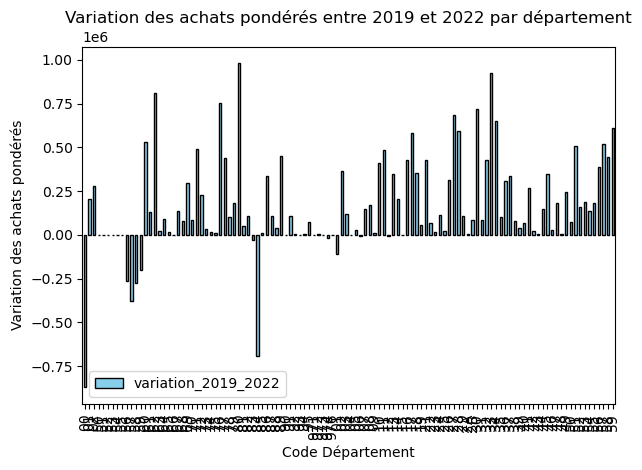

Graphique sauvegardé : cartes_variations_ponderees/variation_ponderee_2019_2022.png


In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Charger le fond de carte des départements français
url_geojson = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
departements_gdf = gpd.read_file(url_geojson)

# Créer un DataFrame global pour stocker les agrégations pondérées par année et département
evolution_df = pd.DataFrame()

# Agréger les données pondérées par département et par année
for annee, df in dataframes.items():
    if "code_departement" in df.columns and "quantite_ponderee" in df.columns:
        aggregated = df.groupby("code_departement")["quantite_ponderee"].sum().reset_index()
        aggregated["annee"] = annee
        evolution_df = pd.concat([evolution_df, aggregated], ignore_index=True)

# Restructurer les données : pivoter pour avoir une colonne par année
pivot_df = evolution_df.pivot(index="code_departement", columns="annee", values="quantite_ponderee").fillna(0)

# Calculer les variations entre chaque année consécutive
for annee in range(2019, 2022):  # 2019 à 2022
    pivot_df[f"variation_{annee}_{annee+1}"] = pivot_df[annee+1] - pivot_df[annee]

# Calculer la variation entre 2019 et 2022
pivot_df["variation_2019_2022"] = pivot_df[2022] - pivot_df[2019]

# Assurez-vous que les codes départements sont au bon format (2 caractères)
pivot_df = pivot_df.reset_index()
pivot_df["code_departement"] = pivot_df["code_departement"].astype(str).str.zfill(2)

# Fusionner avec le GeoDataFrame des départements
merged_gdf = departements_gdf.merge(pivot_df, left_on="code", right_on="code_departement", how="left")

# Créer un répertoire pour les cartes
output_dir = "cartes_variations_ponderees"
os.makedirs(output_dir, exist_ok=True)

# Cartes des variations pondérées pour chaque période
for col in [f"variation_{annee}_{annee+1}" for annee in range(2019, 2022)] + ["variation_2019_2022"]:
    # Créer la carte choroplèthe
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    merged_gdf.plot(column=col,
                    cmap="RdYlGn_r",  # Colormap inversée : Vert pour diminutions, Rouge pour augmentations
                    linewidth=0.8,
                    edgecolor="black",
                    legend=True,
                    ax=ax)

    # Ajouter titre dynamique
    plt.title(f"Variation des achats pondérés ({col.replace('_', ' ')}) par département", fontsize=12)
    ax.axis("off")

    # Annotation pour la légende
    plt.annotate("Vert : Diminution | Rouge : Augmentation", xy=(0.1, 0.1), xycoords="figure fraction", fontsize=10)

    # Sauvegarder la carte
    output_path = os.path.join(output_dir, f"carte_{col}.png")
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.close()
    print(f"Carte sauvegardée : {output_path}")

# Graphique des variations par département entre 2019 et 2022
plt.figure(figsize=(12, 8))
pivot_df.plot(kind="bar", x="code_departement", y="variation_2019_2022", color="skyblue", edgecolor="black")
plt.title("Variation des achats pondérés entre 2019 et 2022 par département")
plt.xlabel("Code Département")
plt.ylabel("Variation des achats pondérés")
plt.xticks(rotation=90)
plt.tight_layout()

# Sauvegarder le graphique
output_graph = os.path.join(output_dir, "variation_ponderee_2019_2022.png")
plt.savefig(output_graph, dpi=300)
plt.show()

print(f"Graphique sauvegardé : {output_graph}")
